<a href="https://colab.research.google.com/github/vev1574/sberbank_data_analysis_06_07_21/blob/master/hw_pandas_vev_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Анализ причин выживаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

In [2]:
import pandas as pd # импортируем Pandas
import re
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv') 

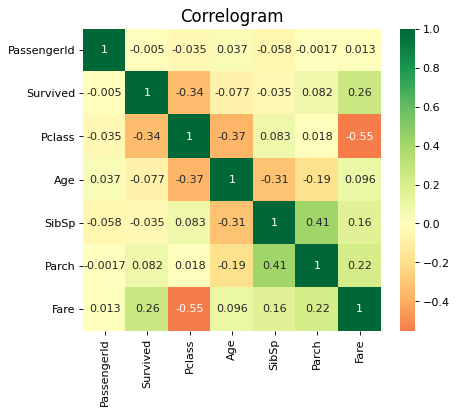

In [4]:
plt.figure(figsize=(6,5), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Шаблон исследования

### Гипотеза 1

__Формулировка__:Титул - значимый признак 

In [5]:
data['tit'] =  data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
data.tit.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [6]:
data[(data['tit']=='Master')&(data['Pclass']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tit
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Master
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,Master
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S,Master
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S,Master
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S,Master
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.00,1,1,C.A. 33112,36.7500,NaN,S,Master
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Master
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,Master
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,Master


Кроме мистер, мисс, мисисс, мадмуазель, мадам видим: Col, Major, Capt - офицеры, Rev, Don - священники,Jonkheer - младший дворянский титул, the Countess - графиня, Master - мальчики до 12 лет

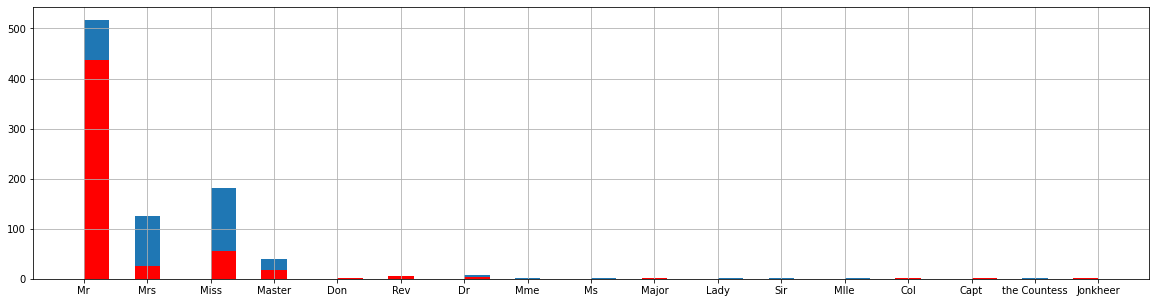

In [7]:
# Код для проверки гипотезы
data.tit.hist(figsize=(20, 5), bins=40)
data[data['Survived'] == 0].tit.hist(color='red', bins=40)
###

Разобъем по классам кают

In [8]:
pd.crosstab(data['tit'], data['Pclass'])

Pclass,1,2,3
tit,,,
Capt,1,0,0
Col,2,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28
Miss,46,34,102


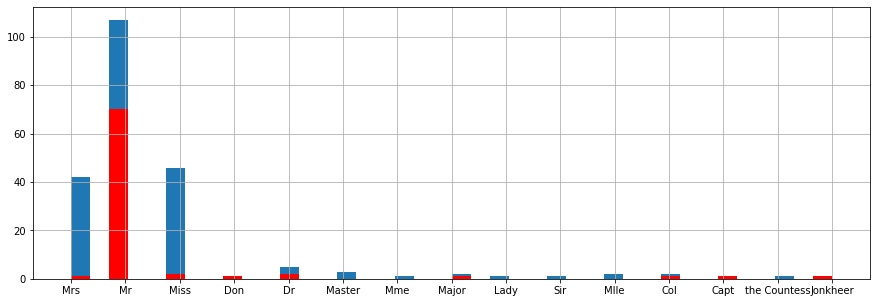

In [9]:
data.tit[data['Pclass']==1].hist(figsize=(15, 5), bins=40)
data[(data['Survived'] == 0)&(data['Pclass']==1)].tit.hist(color='red', bins=40)

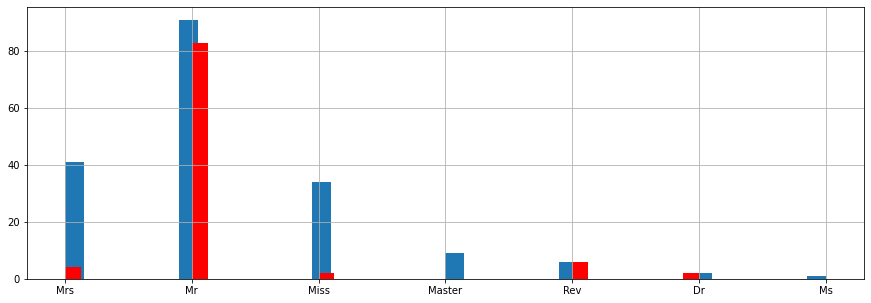

In [10]:
data.tit[data['Pclass']==2].hist(figsize=(15, 5), bins=40)
data[(data['Survived'] == 0)&(data['Pclass']==2)].tit.hist(color='red', bins=40)

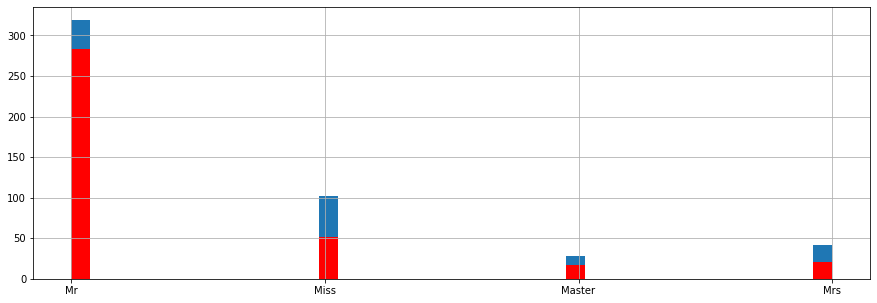

In [11]:
data.tit[data['Pclass']==3].hist(figsize=(15, 5), bins=40)
data[(data['Survived'] == 0)&(data['Pclass']==3)].tit.hist(color='red', bins=40)

__Вывод__:Наблюдается высокая корреляция признака tit*Pclass и целевого признака Survive. Возможно это связано с разнообразиемем титулов у пассажиров кают первого и второго классов, которые располагались выше, ближе к шлюпкам, а такжке приказом капитана в первую очередь спасать женщин и детей.

###  Гипотеза 2

__Формулировка__:Составим портрет выжившего мужчины из 2,3 классса, чем он отличается от погибшего соседа?

In [12]:
# Код для проверки гипотезы
data.drop(['PassengerId'], axis=1, inplace=True)
data.Age.fillna(data.Age.median(),inplace=True)
hero = data[(data['Survived'] == 1)&(data['Pclass']!=1)&(data['Sex']=='male')]

In [13]:
ds = data[(data['Survived'] == 0)&(data['Pclass']!=1)&(data['Sex']=='male')]
hero.describe(),ds.describe()

(       Survived     Pclass        Age      SibSp      Parch       Fare
 count      64.0  64.000000  64.000000  64.000000  64.000000  64.000000
 mean        1.0   2.734375  21.792969   0.390625   0.390625  17.044725
 std         0.0   0.445157  13.346577   0.704119   0.632887  14.142030
 min         1.0   2.000000   0.420000   0.000000   0.000000   0.000000
 25%         1.0   2.000000   9.000000   0.000000   0.000000   7.925000
 50%         1.0   3.000000  26.500000   0.000000   0.000000  11.187500
 75%         1.0   3.000000  29.000000   1.000000   1.000000  19.221875
 max         1.0   3.000000  62.000000   4.000000   2.000000  56.495800,
        Survived      Pclass         Age       SibSp       Parch        Fare
 count     391.0  391.000000  391.000000  391.000000  391.000000  391.000000
 mean        0.0    2.767263   28.744246    0.473146    0.196931   13.899838
 std         0.0    0.423117   10.873388    1.218940    0.590168   12.611243
 min         0.0    2.000000    1.000000   

In [14]:
print('hero\n', hero[['Age','SibSp','Parch','Fare']].sample(10),'\nvictim\n', ds[['Age','SibSp','Parch','Fare']].sample(10))

hero
       Age  SibSp  Parch     Fare
547  28.0      0      0  13.8625
204  18.0      0      0   8.0500
827   1.0      0      2  37.0042
622  20.0      1      1  15.7417
444  28.0      0      0   8.1125
261   3.0      4      2  31.3875
455  29.0      0      0   7.8958
226  19.0      0      0  10.5000
288  42.0      0      0  13.0000
762  20.0      0      0   7.2292 
victim
       Age  SibSp  Parch     Fare
494  21.0      0      0   8.0500
713  29.0      0      0   9.4833
605  36.0      1      0  15.5500
668  43.0      0      0   8.0500
613  28.0      0      0   7.7500
561  40.0      0      0   7.8958
398  23.0      0      0  10.5000
764  16.0      0      0   7.7750
519  32.0      0      0   7.8958
425  28.0      0      0   7.2500


__Вывод__:Средний погибший на 7 лет старше, у него больше родственников и стоимость билета на 23% дешевле

### Гипотеза 3
 
__Формулировка__: Семейные пассажиры. Как наличие родственников влияет на признак

In [15]:
# Код для проверки гипотезы
data['fam'] =  data['Name'].str.split(',',expand=True)[0]
data.fam.describe(),data.Ticket.describe()
###

(count           891
 unique          667
 top       Andersson
 freq              9
 Name: fam, dtype: object, count        891
 unique       681
 top       347082
 freq           7
 Name: Ticket, dtype: object)

In [16]:
data.fam.value_counts().nlargest(10)

Andersson    9
Sage         7
Johnson      6
Carter       6
Goodwin      6
Panula       6
Skoog        6
Rice         5
Asplund      4
Harper       4
Name: fam, dtype: int64

Семьи путешествовали по одному билету. Посмотрим соответствие номеров билетов и фамилий

In [17]:
data.Ticket.value_counts().nlargest(10)

347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
349909          4
PC 17757        4
Name: Ticket, dtype: int64

In [18]:
data.groupby(['Ticket','fam'])[['Pclass','Age','Survived','Parch', 'SibSp']].aggregate({'Pclass':min, 'Age':np.count_nonzero, 'Survived':sum, 'Parch':sum, 'SibSp':sum}).sample(15) #оцифровать фамилии билеты и титулы еще одна матрица корреляций

,,Pclass,Age,Survived,Parch,SibSp
Ticket,fam,,,,,
PC 17757,Endres,1,1.0,1,0,0
370365,O'Brien,3,2.0,1,0,2
PC 17569,Lurette,1,1.0,1,0,0
PC 17756,Compton,1,1.0,1,1,1
349233,Mineff,3,1.0,0,0,0
A/4 48871,Davies,3,1.0,0,0,2
2683,Lemberopolous,3,1.0,0,0,0
27849,Buss,2,1.0,1,0,0
113767,Rood,1,1.0,0,0,0


Однофамильцев не так много. Люди с одинаковыми фамилиями как правило одна семья

In [48]:
data[data['Ticket']== '2661']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tit,fam,ch,chip
65,1,3,"Moubarek, Master. Gerios",male,28.0,1,1,2661,15.2458,NaN,C,Master,Moubarek,1,1.0
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.0,1,1,2661,15.2458,NaN,C,Master,Moubarek,1,1.0


In [47]:
data[data['fam']=='Skoog'] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tit,fam,ch,chip
63,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S,Master,Skoog,0,0.333333
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S,Mrs,Skoog,1,0.333333
360,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S,Mr,Skoog,1,0.333333
634,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S,Miss,Skoog,0,0.333333
642,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S,Miss,Skoog,0,0.333333
819,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S,Master,Skoog,0,0.333333


Люди занимавшие места по одному билету очевидно старались держаться вместе. Создадим признак к каждому билету соотношение взрослых и детей, остальным присвоим 1

In [46]:
data['ch']=(data['Age']>14).astype(np.int8)
data['chip'] = data.groupby(['Ticket'])[['ch']].transform(sum)/data.groupby(['Ticket'])[['ch']].transform(len)


__Вывод__:Признак chip будет обозначать мобильность семьи

In [49]:
le = preprocessing.LabelEncoder()
le.fit(data['fam'])
data['fam_c']=le.transform(data['fam'])
le.fit(data['Ticket'])
data['Ticket_c']=le.transform(data['Ticket'])
le.fit(data['tit'])
data['tit_c']=le.transform(data['tit'])

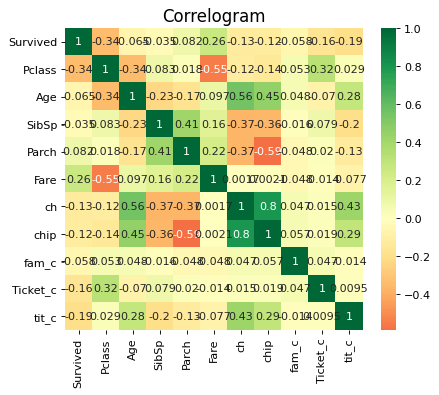

In [50]:
plt.figure(figsize=(6,5), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
le.classes_


array(['Abbing', 'Abbott', 'Abelson', 'Adahl', 'Adams', 'Ahlin', 'Aks',
       'Albimona', 'Alexander', 'Alhomaki', 'Ali', 'Allen', 'Allison',
       'Allum', 'Andersen-Jensen', 'Anderson', 'Andersson', 'Andreasson',
       'Andrew', 'Andrews', 'Angle', 'Appleton', 'Arnold-Franchi',
       'Artagaveytia', 'Asim', 'Asplund', 'Astor', 'Attalah', 'Aubart',
       'Augustsson', 'Ayoub', 'Backstrom', 'Baclini', 'Badt', 'Bailey',
       'Balkic', 'Ball', 'Banfield', 'Barah', 'Barbara', 'Barber',
       'Barkworth', 'Barton', 'Bateman', 'Baumann', 'Baxter', 'Bazzani',
       'Beane', 'Beavan', 'Becker', 'Beckwith', 'Beesley', 'Behr',
       'Bengtsson', 'Berglund', 'Berriman', 'Betros', 'Bidois', 'Bing',
       'Birkeland', 'Bishop', 'Bissette', 'Bjornstrom-Steffansson',
       'Blackwell', 'Blank', 'Bonnell', 'Bostandyeff', 'Boulos', 'Bourke',
       'Bowen', 'Bowerman', 'Bracken', 'Bradley', 'Braund', 'Brewe',
       'Brocklebank', 'Brown', 'Bryhl', 'Burke', 'Burns', 'Buss',
       'Butler'

### Вывод исследования: В ходе работы были сгенерированы новые признаки. Признаки chip(дети/родители по одному билету), tit (титул), и в меньшей степени fam (фамилия) после преобразования OneHotEncoder могут быть достаточно перспективны  для использования в модели или в  генерации  новых признаков.

  